# Code to simulate and visualise 2D system of Delta Hes

In [1]:
# import necessary packages
import numpy as np
import matplotlib.pyplot as plt
from types import SimpleNamespace
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
from tqdm import tqdm
import visualisation as vis
from delta_hes_model import *

## Parameters

In [2]:
#set the lattice of the cells 
P = 20
Q = 6

lattice = get_lattice(P, Q)

# # set initial parameters of the reactions 
gamma_h = 0.03
gamma_d = 0.03
gamma_m = 0.03
p_h = 100
p_d = 100
T_h = 20
T_coupling = 0
w_h = 1
w_coupling = 0.01
l = 5
n = 3

params = get_params(gamma_h, gamma_d, gamma_m, p_h, p_d, T_h, T_coupling, w_h, w_coupling, l, n, lattice, grad_hes = True, grad_coup = False, grad_hes_strength = 0.2, grad_coup_strength = 0)

## Run simulation

In [3]:
num_tsteps = 3000
dt = 0.2
h, m_h, d, m_d = simulate(num_tsteps, dt, lattice, params, coupling_type= 'Delta', initial_type='checkerboard')

100%|██████████| 2999/2999 [00:07<00:00, 384.50it/s]


## Plot

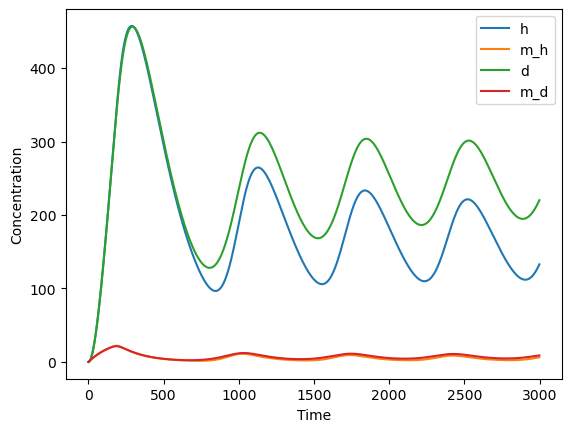

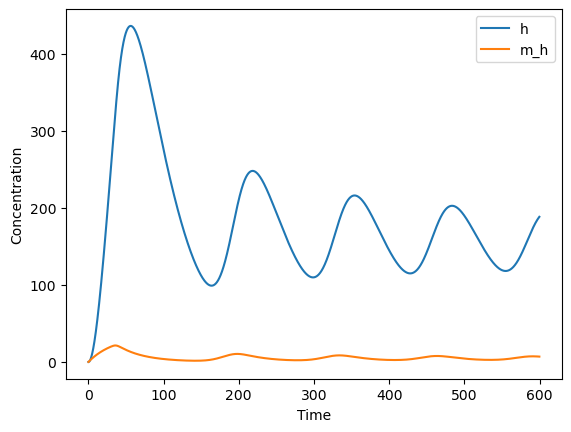

C:\Users\kbmcd\AppData\Local\Temp\ipykernel_24088\3496929226.py:39: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


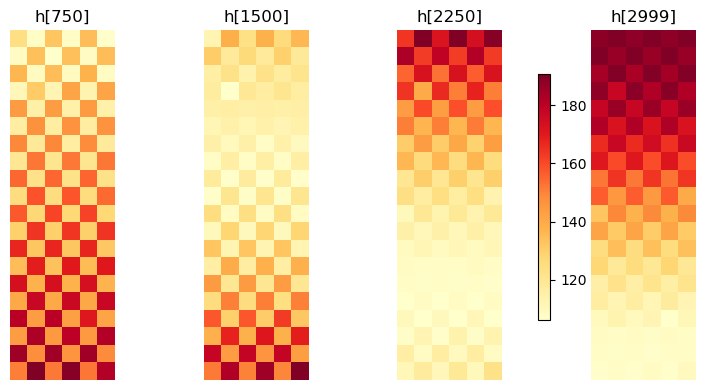

In [5]:
plt.figure()
plt.plot(h[:,10,0], label = 'h')
plt.plot(m_h[:,10,0], label = 'm_h')
plt.plot(d[:,10,0], label = 'd')
plt.plot(m_d[:,10,0], label = 'm_d')
plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend()
plt.show()

plt.figure()
plt.plot(np.arange(num_tsteps)*dt, h[:,0,0], label = 'h')
plt.plot(np.arange(num_tsteps)*dt, m_h[:,0,0], label = 'm_h')
#plt.plot(d[:,10,0], label = 'd')
# plt.plot(m_d[:,10,0], label = 'm_d')

plt.xlabel('Time')
plt.ylabel('Concentration')
plt.legend()
plt.show()

# Assuming h is already defined and has shape (n, x, y)
n = h.shape[0]

# Define the indices for 1/4, 1/2, 3/4, and last
indices = [n // 4, n // 2, (3 * n) // 4, n - 1]
titles = [f'h[{i}]' for i in indices]

# Create the 4 subplots in a row
fig, axs = plt.subplots(1, 4, figsize=(8, 4))

for ax, idx, title in zip(axs, indices, titles):
    im = ax.imshow(h[idx, :, :], cmap='YlOrRd')
    ax.set_title(title)
    ax.axis('off')

# Add a colorbar to the right of all subplots
cbar = fig.colorbar(im, ax=axs.ravel().tolist(), shrink=0.8)
plt.tight_layout()
plt.show()



## Animate

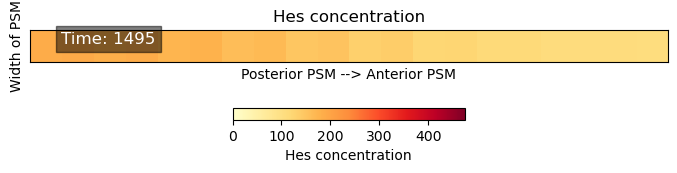

In [6]:
vis.animate_2D(h[::10,:,:], interval=5, plot_save=False, filename='1D_unstable_travelling_wave.gif', title = 'Hes concentration')